#0. Imports

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
data_path = ####
results_path = ####

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd 
import re
import string

from nltk import download
download('stopwords')
from nltk.corpus import stopwords
import matplotlib.pyplot as plt


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


#1. Load dataset

In [ ]:
reviews = pd.read_csv(data_path+"news-summary/news_summary_more.csv", encoding='latin-1')
print(reviews.shape)
reviews.head()

(98401, 2)


,headlines,text
0,upGrad learner switches to career in ML & Al w...,"Saurav Kant, an alumnus of upGrad and IIIT-B's..."
1,Delhi techie wins free food from Swiggy for on...,Kunal Shah's credit card bill payment platform...
2,New Zealand end Rohit Sharma-led India's 12-ma...,New Zealand defeated India by 8 wickets in the...
3,Aegon life iTerm insurance plan helps customer...,"With Aegon Life iTerm Insurance plan, customer..."
4,"Have known Hirani for yrs, what if MeToo claim...",Speaking about the sexual harassment allegatio...


In [ ]:
# check null values
reviews.isnull().sum()

headlines    0
text         0
dtype: int64

#2. Preprocessing

In [ ]:
# A list of contractions from http://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python
contractions =          {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have", "i've": "i have"}

CURRENCIES = {
    "$": "USD", "zł": "PLN", "£": "GBP", "¥": "JPY", "฿": "THB", "₡": "CRC", "₦": "NGN","₩": "KRW",
    "₪": "ILS", "₫": "VND", "€": "EUR", "₱": "PHP", "₲": "PYG", "₴": "UAH", "₹": "INR",}
CURRENCY_REGEX = re.compile(
    "({})+".format("|".join(re.escape(c) for c in CURRENCIES.keys())))


In [ ]:
def clean_text(text, remove_stopwords = True):
    
    #lower case
    text = text.lower()

    #remove contractions
    if True:
        text = text.split()
        new_text = []
        for word in text:
            if word in contractions:
                new_text.append(contractions[word])
            else:
                new_text.append(word)
        text = " ".join(new_text)

    #remove unicode characters
    text = text.encode('ascii', 'ignore').decode()

    #remove stop words
    if remove_stopwords:
      stop_words = set(stopwords.words("english"))
      text = " ".join([word for word in text.split()if word not in stop_words])

    #remove punctuations
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)

    #remove currencies
    text = CURRENCY_REGEX.sub(' ',text)

    #remove numbers
    text = re.sub(r'\w*\d+\w*', '', text)

    #replace the over spaces
    text = re.sub('\s{2,}', " ", text)



    return text


In [ ]:
cleaned_headlines = []
cleaned_text = []

for headlines in reviews['headlines']:
    cleaned_headlines.append(clean_text(headlines, remove_stopwords=False))
print("Headlines are complete.")

for text in reviews['text']:
    cleaned_text.append(clean_text(text))
print("Texts are complete.")

Headlines are complete.
Texts are complete.


In [ ]:
# clean reviews
for i in range(5):
    print("Review: ",i+1)
    print(cleaned_headlines[i])
    print('-'*10)
    print(cleaned_text[i])
    print()

Review:  1
upgrad learner switches to career in ml al with salary hike
--------------------------------------------------------------------------------
saurav kant alumnus upgrad iiit b s pg program machine learning artificial intelligence sr systems engineer infosys almost years work experience program upgrad s degree career support helped transition data scientist tech mahindra salary hike upgrad s online power learning powered lakh careers 

Review:  2
delhi techie wins free food from swiggy for one year on cred
--------------------------------------------------------------------------------
kunal shah s credit card bill payment platform cred gave users chance win free food swiggy one year pranav kaushik delhi techie bagged reward spending cred coins users get one cred coin per rupee bill paid used avail rewards brands like ixigo bookmyshow ubereats cult fit more 

Review:  3
new zealand end rohit sharma led india s match winning streak
----------------------------------------------

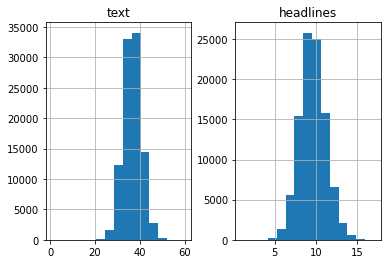

In [ ]:
# distribution of words
text_word_count = []
headlines_word_count = []

for i in cleaned_text:
    text_word_count.append(len(i.split()))
for i in cleaned_headlines:
    headlines_word_count.append(len(i.split()))

length_df = pd.DataFrame({'text': text_word_count, 'headlines': headlines_word_count})
length_df.hist(bins=15)
plt.show()

In [ ]:
count = 0
for i in cleaned_text:
    if(len(i.split())<=55):
        count += 1
print(count/len(cleaned_text))

0.9999593500066056


By setting the maximum lenght for text to 55, 99.99% samples will be covered.

Setting maximum text length to 55 and maximum headline length to 15. 

The titles generated will be 15 words, in the longest case.

In [ ]:
max_headlines_len=15
max_text_len=55

In [ ]:
cleaned_text = np.array(cleaned_text)
cleaned_headlines = np.array(cleaned_headlines)

text=[]
headlines=[]

# create dataframe with previous length conditions:
for i in range(len(cleaned_text)):
    if(len(cleaned_headlines[i].split())<=max_headlines_len and len(cleaned_text[i].split())<=max_text_len):
        text.append(cleaned_text[i])
        headlines.append(cleaned_headlines[i])

df=pd.DataFrame({'text':text,'headlines':headlines})

## adding 'sostok': start of sentence, and 'eostok': end  of sentence as tokens in headlines
df['headlines'] = df['headlines'].apply(lambda x : 'sostok '+ x + ' eostok')


In [ ]:
df

,text,headlines
0,saurav kant alumnus upgrad iiit b s pg program...,sostok upgrad learner switches to career in ml...
1,kunal shah s credit card bill payment platform...,sostok delhi techie wins free food from swiggy...
2,new zealand defeated india wickets fourth odi ...,sostok new zealand end rohit sharma led india ...
3,aegon life iterm insurance plan customers enjo...,sostok aegon life iterm insurance plan helps c...
4,speaking sexual harassment allegations rajkuma...,sostok have known hirani for yrs what if metoo...
...,...,...
98373,crpf jawan tuesday axed death sharp edged weap...,sostok crpf jawan axed to death by maoists in ...
98374,uff yeh first song sonakshi sinha starrer upc...,sostok first song from sonakshi sinha s noor t...
98375,according reports new version science fiction ...,sostok the matrix film to get a reboot report...
98376,new music video shows rapper snoop dogg aiming...,sostok snoop dogg aims gun at clown dressed as...


#3. Write to file preprocessed data

In [ ]:
df.head()
df.to_csv(results_path+'news_preprocessed.csv',index=False)